In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import lightkurve as lk
import numpy as np

In [2]:
def plot_centroids(lc, transit_time=None, window=None):
        
    # bin the data 
    lc_bin = lc.bin(7/60/24)
    
    # generate a mask so that we only see the times around the transit event
    if (window == None) or (transit_time == None):
        transit_mask = lc_bin.time.value > 0
    else:
        transit_mask = (lc_bin.time.value > transit_time - window) & (lc_bin.time.value < transit_time + window)
        
    # make a plot with three panels so that we can see the lightcurve and the centroid positions 
    fig, ax = plt.subplots(3,1, figsize = (8,5), sharex= True)
    
    # plot the lightcurve in the top panel (in orange) 
    ax[0].plot(lc_bin.time.value[transit_mask], lc_bin.sap_flux.value[transit_mask], color = "darkorange", lw = 0, marker = ".", ms = 3)
    
    # plot the centroid motions in the column direction in the middle panel
    ax[1].plot(lc_bin.time.value[transit_mask], lc_bin.mom_centr1.value[transit_mask]-np.nanmean(lc_bin.mom_centr1.value[transit_mask]), color = "black", lw = 0, marker = ".", ms = 2, alpha = 0.5)
    ax[1].plot(lc_bin.time.value[transit_mask], lc_bin.pos_corr1.value[transit_mask]-np.nanmean(lc_bin.pos_corr1.value[transit_mask]), color = "red", lw = 0, marker = ".", ms = 2, alpha = 0.5)
    
    # plot the centroid motions in the row direction in the middle panel
    ax[2].plot(lc_bin.time.value[transit_mask], lc_bin.mom_centr2.value[transit_mask] - np.nanmedian(lc_bin.mom_centr2.value[transit_mask]), color = "black", lw = 0, marker = ".", ms = 2, alpha = 0.5, label = "Brightness motion")
    ax[2].plot(lc_bin.time.value[transit_mask], lc_bin.pos_corr2.value[transit_mask]- np.nanmedian(lc_bin.pos_corr2.value[transit_mask]), color = "red", lw = 0, marker = ".", ms = 2, alpha = 0.5, label = "Satellite motion")
    
    if (transit_time != None):
        # draw a vertical line at the time of the transit event 
        ax[0].axvline(transit_time, color = "grey", zorder = -1)
        ax[1].axvline(transit_time, color = "grey", zorder = -1)
        ax[2].axvline(transit_time, color = "grey", zorder = -1)
    
    # label the axes
    ax[0].set_ylabel("Flux")
    ax[1].set_ylabel("Column position")
    ax[2].set_ylabel("Row position")
    plt.xlabel("Time (TJD)")
    
    if (window != None) and (transit_time != None):   
        plt.xlim(transit_time - window, transit_time + window)
        
    plt.tight_layout()
    plt.legend()
    plt.show()

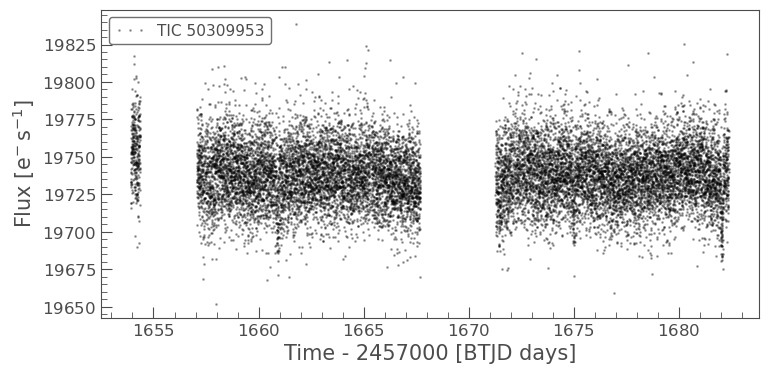

In [36]:
sector_data = lk.search_lightcurve("TIC 50309953", author = "SPOC", sector = 13)[0]
lc = sector_data.download()

lc.plot(linewidth = 0, marker = ".", color = "black", alpha = 0.3)
plt.show()

In [ ]:
# bin the data (watch previous episode on binning)
lc_bin = lc.bin(7/60/24)

# set up the plotting region
fig, ax = plt.subplots(2,1, figsize = (8,5), sharex= True)

# plot the two different centroid motions in the column and row positions
ax[0].plot(lc_bin.time.value, lc_bin.mom_centr1.value-np.nanmean(lc_bin.mom_centr1.value), color = "black", lw = 0, marker = ".", ms = 1)
ax[0].plot(lc_bin.time.value, lc_bin.pos_corr1.value-np.nanmean(lc_bin.pos_corr1.value), color = "red", lw = 0, marker = ".", ms = 1)

ax[1].plot(lc_bin.time.value, lc_bin.mom_centr2.value - np.nanmedian(lc_bin.mom_centr2.value), color = "black", lw = 0, marker = ".", ms = 1, label = "Brightness motion")
ax[1].plot(lc_bin.time.value, lc_bin.pos_corr2.value- np.nanmedian(lc_bin.pos_corr2.value), color = "red", lw = 0, marker = ".", ms = 1, label = "Satellite motion")

# define the axis labels
ax[0].set_ylabel("Column position")
ax[1].set_ylabel("Row position")
plt.xlabel("Time (TJD)")
plt.legend()
plt.tight_layout()
plt.show()

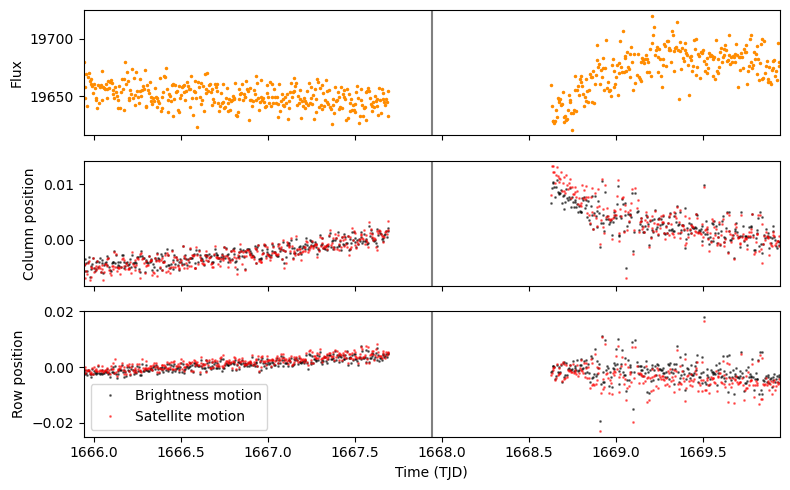

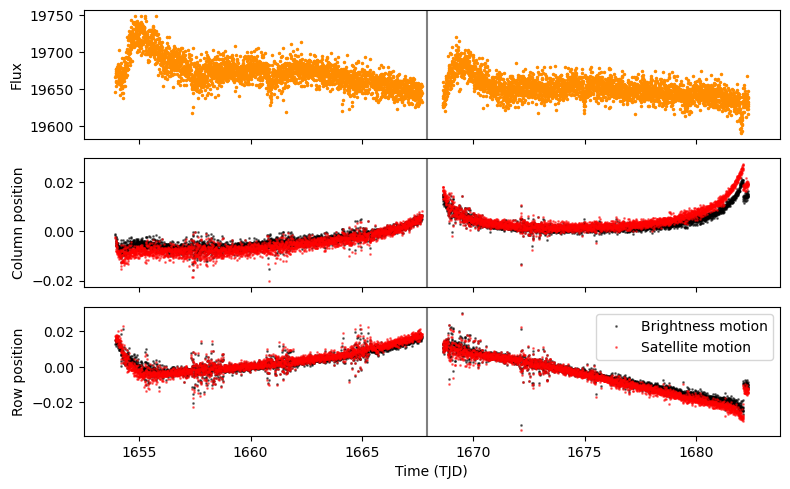

In [40]:
# define the transit time
transit_time = 1660.899932 + 7.04067
# and the cut out region 
window = 2

plot_centroids(lc, transit_time, window)
plot_centroids(lc, transit_time)